# FINNDING HEAVY TRAFFIC INDICATORS
* ## Introduce
We're going to analyze dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94)   
![Biểu đồ giao thông](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Interstate_94_map.png/300px-Interstate_94_map.png)  
We can download this dataset at [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)
* ## Target
We want to explore some indicators contribute to heavy traffic and determine some model about traffic congestion, what are indicators behind heavy traffic ??


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import file 
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic.head(20)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,NaN,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,NaN,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,NaN,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 1. Note:
* The data documention mentions that a station located approximately midway between Minneapolis and Saint Paul
* The station only records westbound traffic ( cars moving from east to west )
* Each row is about traffic in a hour of oneday
There are some variables we have in dataset:
* __`holiday`__ : Name of holiday if this day is in holiday
* __`temp`__ : Average of temperature in one hour ( Unit: Kelvin)
* __`rain_1h`__ : Amount of rain that occured in the hour ( Unit: mm )
* __`snow_1h`__ : Amount of snow that occured in the hour ( Unit: mm )
* __`cloud_all`__ : Percentage of cloud cover ( Unit: % )
* __`weather_main`__: Short textual described weather in the hour
* __`weather_description`__ : Long textual described weather in the hour
* __`date_time`__ : Time when data was collected
* __`traffic_volume`__: Volume of traffic in the hour 

In [5]:
traffic.describe(include = 'all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


## 2. Change type of data
We want to change some type of columns : 
* __`temp`__ : We want to change unit Kelvin to unit Celcius by minusing 273.15
* __`date_time`__ : We want to change this column to type __datetime__

In [6]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


## 3. Basic Analyst

#### 3.1 Time is first
We want to have a  general observe about westbound traffic in I-94, we wil make a histogram about frequency of each traffic volume range

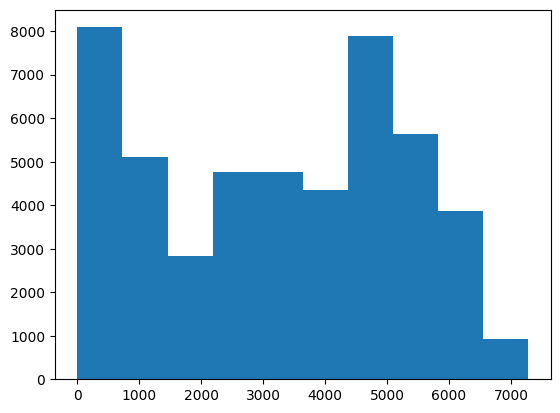

In [8]:
%matplotlib inline 
plt.hist(traffic["traffic_volume"])
plt.show()

In [9]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

It's a not soft histograme, no pattern we can see from histogram, but we have some comment:  
* The most frequency range is __0 to 800__ and __4500 to 5000__, a big difference from two range

First, we predict __nighttime and daytime__ is one important indicator.  
We can visualize average traffic volume by hour in day

In [10]:
time = traffic["date_time"].dt.time
print(time)

0        09:00:00
1        10:00:00
2        11:00:00
3        12:00:00
4        13:00:00
           ...   
48199    19:00:00
48200    20:00:00
48201    21:00:00
48202    22:00:00
48203    23:00:00
Name: date_time, Length: 48204, dtype: object


In [11]:
diction = {}
for i in time.unique() : 
    critiea = traffic["date_time"].dt.time == i
    aver = traffic.loc[critiea, "traffic_volume"].mean()
    diction[i] = aver


<Axes: xlabel='time'>

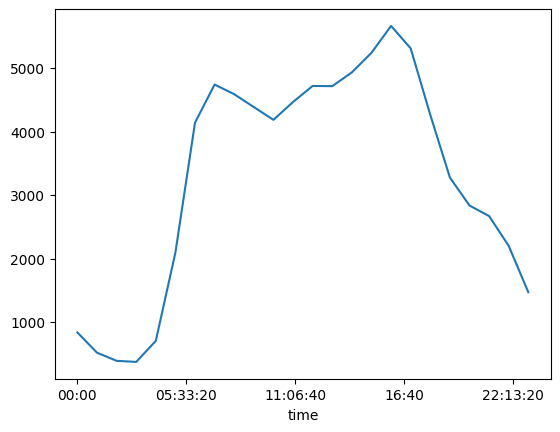

In [12]:
time_ser = pd.Series(diction).sort_index()
time_ser.plot.line()


##### Otherway with groupby

          traffic_volume
time                    
00:00:00      834.781051
01:00:00      516.449000
02:00:00      388.353640
03:00:00      371.090864
04:00:00      702.551889
05:00:00     2094.573437
06:00:00     4140.503594
07:00:00     4740.181337
08:00:00     4587.497115
09:00:00     4385.277502
10:00:00     4184.665544
11:00:00     4465.877561
12:00:00     4718.293095
13:00:00     4714.940682
14:00:00     4931.888776
15:00:00     5240.524302
16:00:00     5663.756539
17:00:00     5310.076048
18:00:00     4263.718530
19:00:00     3276.394187
20:00:00     2834.667509
21:00:00     2668.940464
22:00:00     2199.405717
23:00:00     1469.135294


<Axes: xlabel='time'>

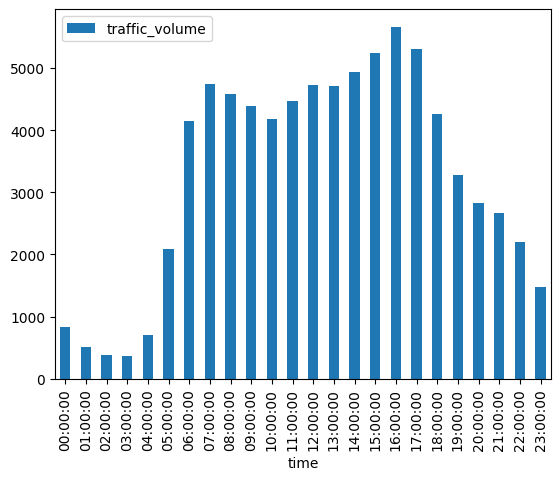

In [13]:
traffic["time"] = traffic["date_time"].dt.time
m = traffic[["time", "traffic_volume"]].groupby("time").mean()
print(m)
m.plot.bar()

In general, the traffic volume in __daytime is higher than nightime__ , the traffic volume has rupidly increase from 4:00:00 to 7:00:00 , constant and reach top on 16:00:00 and start decreasing in late afternoon and nightime

#### But !!  
Our goal is determine the indicators of heavy traffic, so we decided to only focus on the daytime data moving forward  
One of the possible indicators of heavy traffic is time. There might be more people on the road in certain month, on a certain day, or at a certain time of the day  
We're going to look at a few line plots showing how the traffic volume change according to following parameters:
* _Month_
* _Day of the week_
* _Time of day_  
We use mean() and groupby() to visualize.
Of course, we take only the rows which `daytime` in daytime ( from 7:00:00 to 19:00:00)

In [14]:
# Find average traffic volume by month  
from datetime import time
critiea = traffic["time"].between(time(7),time(19))
day = traffic[critiea]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,09:00:00
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10:00:00
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11:00:00
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12:00:00
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13:00:00
...,...,...,...,...,...,...,...,...,...,...
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15:00:00
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16:00:00
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17:00:00
48198,NaN,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,18:00:00


C:\Users\Nguyễn Anh Văn\AppData\Local\Temp\ipykernel_23704\1401471840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["month"] = day["date_time"].dt.month
C:\Users\Nguyễn Anh Văn\AppData\Local\Temp\ipykernel_23704\1401471840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["day_of_week"] = day["date_time"].dt.day_of_week
C:\Users\Nguyễn Anh Văn\AppData\Local\Temp\ipykernel_23704\1401471840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

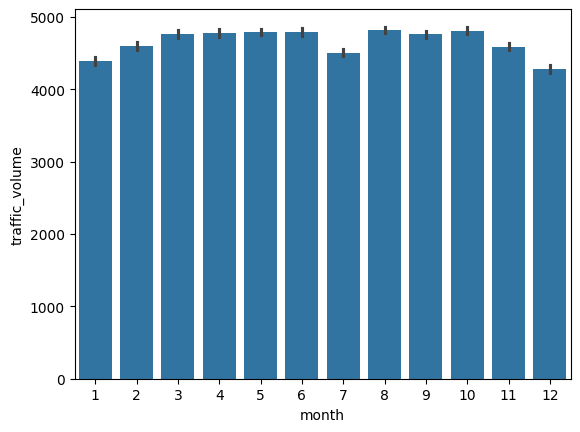

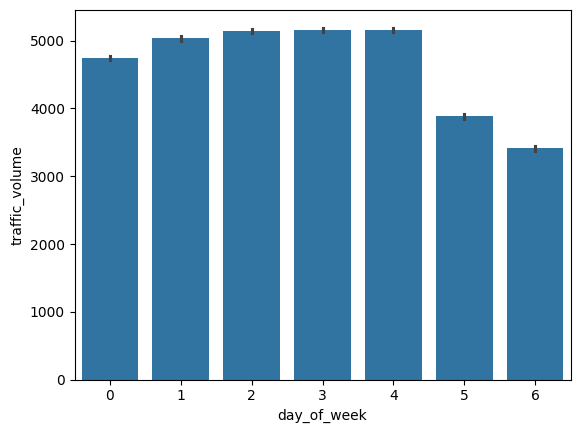

In [15]:
day["month"] = day["date_time"].dt.month
day["day_of_week"] = day["date_time"].dt.day_of_week
day["time_of_day"] = day["date_time"].dt.hour
sns.barplot(day, x = "month",
                 y = "traffic_volume")
plt.show()
sns.barplot(day, x = "day_of_week",
                 y = "traffic_volume")
plt.show()

* __Month__: There is a little different traffic volume between months, but we still identify in winter, the traffic volume is less than summer, but little. 
* __Day of Week__: We can see Traffic volume in bussiness day is more than weekend 


OK !! We have one indicator that traffic in bussiness day is busier than weekend. So, in bussiness day, which indicator make heavy traffic

In [16]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time,month,day_of_week,time_of_day
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,09:00:00,10,1,9
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10:00:00,10,1,10
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11:00:00,10,1,11
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12:00:00,10,1,12
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13:00:00,10,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15:00:00,9,6,15
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16:00:00,9,6,16
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17:00:00,9,6,17
48198,NaN,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,18:00:00,9,6,18


In [17]:
day["hour"] = day["date_time"].dt.hour
business_day = day.copy()[day["day_of_week"] <= 4]
weekend = day.copy()[day["day_of_week"] >= 5]
by_hour_business = business_day.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)


C:\Users\Nguyễn Anh Văn\AppData\Local\Temp\ipykernel_23704\104593167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["hour"] = day["date_time"].dt.hour


Let's take a sight about traffic volume by hour

Text(0.5, 1.0, 'Traffic in weekend by hour')

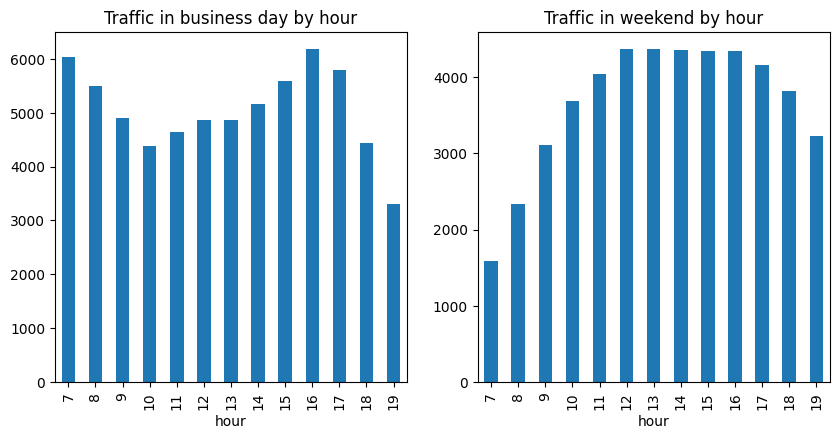

In [18]:
plt.figure(figsize = (10, 10)) 
plt.subplot(2,2,1)
by_hour_business["traffic_volume"].plot.bar()
plt.title("Traffic in business day by hour")
plt.subplot(2,2,2)
by_hour_weekend["traffic_volume"].plot.bar()
plt.title("Traffic in weekend by hour")


It's a diffirent trend from two bar graph:
* __In Business day__ : There are two high time, there are 7:00:00 ( time to office ) and 16:00:00 ( time to off-work ). Traffic volume decrease from 7:00:00 to noon, from 16:00:00 to evening.
* __In weekend__: It's a nice curve. In noon and afternoon, the traffic mostly constant, traffic in morning isn't high like in business day. People can use weekend to picnic, travel,..., they mustn't wake up early than normal.

So, The high time of business day is __time to office__ and __off-work__

### Conclusion about indicator `time`  
Time is the import indicator contribute to traffic volume
* Traffic in daytime much busier than nightime
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* Traffic in bussiness day is heavier than weekend
* There are two rush hours in business day: time to go office ( about 7 am ) and time to off-work ( about 4 pm )

#### 3.2 How about another indicator : weather
We have another possible indicator of heavy traffic. The dataset provides us with a few useful column about weather `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`  
Let's see some correlation coefficient values between `traffic_volume` and the numberical weather columns

In [19]:
day.corr(numeric_only=True)["traffic_volume"]

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
day_of_week      -0.371023
time_of_day      -0.007369
hour             -0.007369
Name: traffic_volume, dtype: float64

count    25838.000000
mean       282.347796
std         13.302562
min          0.000000
25%        272.720000
50%        283.867000
75%        293.610000
max        310.070000
Name: temp, dtype: float64


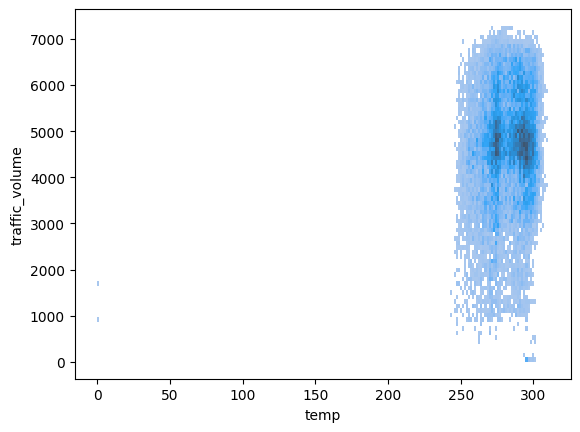

In [27]:
sns.histplot(day, x = "temp", y = "traffic_volume")
print(day["temp"].describe())

Column `temp` has some oulier value, but we still find that we didn't find any reliable indicator of heavy traffic, the correlation is small.  
They canbe a hidden model behind these weather variables, but in my ability, I only consider correlation between one feature and target

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

In [24]:
traffic["weather_main"].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [25]:
traffic["weather_description"].value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

Column `weather_main` has a small unique value but `weather_description` hasn't.  
We're going to calculate the average traffic volume associated with each unique value in these two column.  
We still use daytime data to visualize.

4649.29236008979


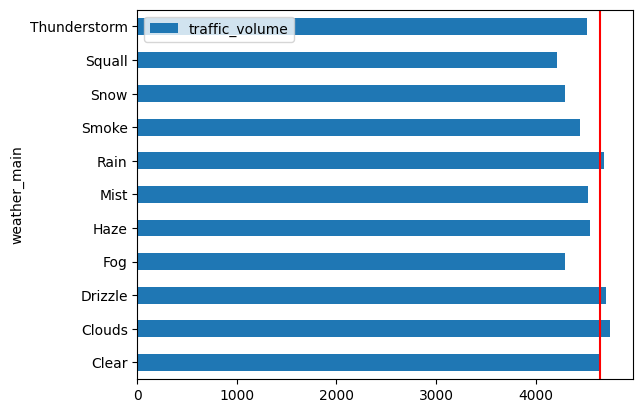

In [49]:
print(day["traffic_volume"].mean())
by_weather_main = day[["traffic_volume", "weather_main"]].copy().groupby("weather_main").mean()
by_weather_main.plot.barh()
plt.axvline(x=4649, color='r', linestyle='-') # Chose average value to draw line

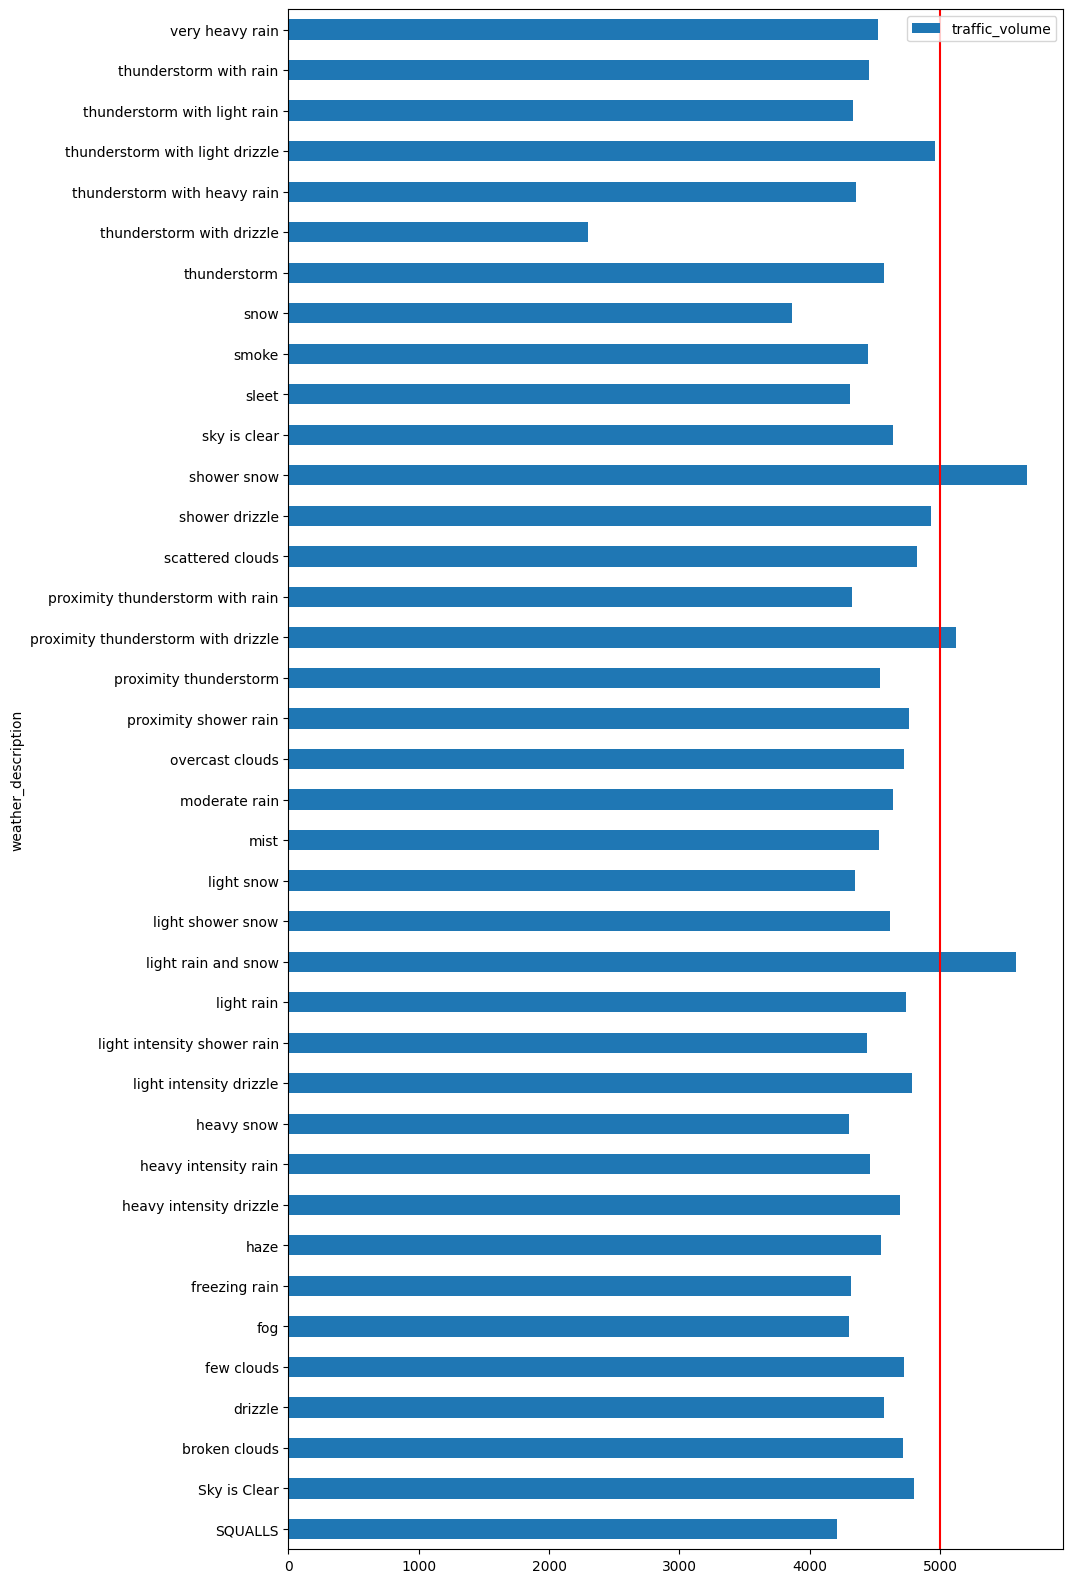

In [50]:
by_weather_decription = day[["traffic_volume", "weather_description"]].copy().groupby("weather_description").mean()
by_weather_decription.plot.barh(figsize=(10,20))
plt.axvline(x=5000, color='r', linestyle='-') 

There are some weather type as a heavy traffic indicator:
* light rain and snow
* shower snow
* proximity thunderstorm

And in general __Rain__ is a indicator contribute to heavy traffic